## Recommender Systems: Collaborative Filtering + Content-Based Filtering

### Dataset: MovieLens 100K Dataset

#### Import Libraries

In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [336]:
# we are using u.data file (ratings) and u.item file (movies)
# they do not have headers so we are assigning below

columns_udata=["userId","movieId",'Rating', 'timestamp']

columns_uitem = [
"movieId", "title", "release_date", "unknownHeader", "IMDb_URL", 
"unknownGenre", "actionGenre", "adventureGenre", "animationGenre", "childrenGenre", "comedyGenre", 
"crimeGenre", "documentaryGenre", "dramaGenre", "fantasyGenre", "film-noirGenre", "horrorGenre", 
"musicalGenre", "mysteryGenre", "romanceGenre", "sci-fiGenre", "thrillerGenre", "warGenre", "westernGenre"]

ratings = pd.read_csv('u.data', sep='\t', header=None, names = columns_udata)
movies = pd.read_csv('u.item', sep='|', header=None, names=columns_uitem, encoding='ISO-8859-1')

In [338]:
movies.head()

,movieId,title,release_date,unknownHeader,IMDb_URL,unknownGenre,actionGenre,adventureGenre,animationGenre,childrenGenre,...,fantasyGenre,film-noirGenre,horrorGenre,musicalGenre,mysteryGenre,romanceGenre,sci-fiGenre,thrillerGenre,warGenre,westernGenre
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [340]:
ratings.head()

,userId,movieId,Rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


#### EDA + Preprocessing

In [343]:
n_ratings = ratings.shape[0]
n_movies = movies.shape[0]
n_users = ratings['userId'].nunique()

print(f'Number of ratings: {n_ratings}')
print(f'Number of unique movies: {n_movies}')
print(f'Number of unique users: {n_users}')

Number of ratings: 100000
Number of unique movies: 1682
Number of unique users: 943


In [345]:
# check for null values
print(f'Null values in Ratings dataset:\n{ratings.isnull().sum()} \n')
print(f'Null values in Movies dataset:\n{movies.isnull().sum()} \n')

Null values in Ratings dataset:
userId       0
movieId      0
Rating       0
timestamp    0
dtype: int64 

Null values in Movies dataset:
movieId                0
title                  0
release_date           1
unknownHeader       1682
IMDb_URL               3
unknownGenre           0
actionGenre            0
adventureGenre         0
animationGenre         0
childrenGenre          0
comedyGenre            0
crimeGenre             0
documentaryGenre       0
dramaGenre             0
fantasyGenre           0
film-noirGenre         0
horrorGenre            0
musicalGenre           0
mysteryGenre           0
romanceGenre           0
sci-fiGenre            0
thrillerGenre          0
warGenre               0
westernGenre           0
dtype: int64 



In [347]:
# drop 'unknownHeader' column
movies.drop('unknownHeader', axis=1, inplace=True)

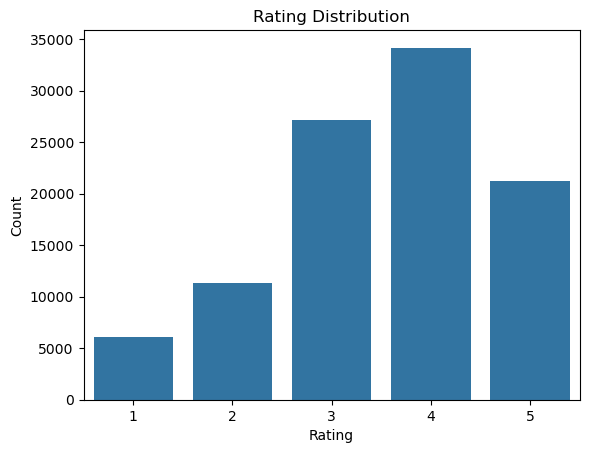

In [349]:
# plot the ratings

sns.countplot(x='Rating', data=ratings)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [351]:
# mean global rating

print(f'Mean Global Rating: {round(ratings['Rating'].mean(),1)}')

Mean Global Rating: 3.5


In [353]:
# which movies have the most ratings

movie_ratings = ratings.merge(movies, on='movieId')
movie_ratings['title'].value_counts()

title
Star Wars (1977)                   583
Contact (1997)                     509
Fargo (1996)                       508
Return of the Jedi (1983)          507
Liar Liar (1997)                   485
                                  ... 
Leopard Son, The (1996)              1
Stefano Quantestorie (1993)          1
Quartier Mozart (1992)               1
Reluctant Debutante, The (1958)      1
Dadetown (1995)                      1
Name: count, Length: 1664, dtype: int64

In [355]:
# average ratings for each movie
mean_ratings = movie_ratings.groupby('title')[['Rating']].mean()
mean_ratings.sort_values('Rating', ascending=False)

,Rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0
King of New York (1990),1.0
Touki Bouki (Journey of the Hyena) (1973),1.0


In [357]:
# this does not track with the most rated movies.
# for example, we can see that first 2 movies shown above have very few ratings

print(f'Ratings for They Made Me a Criminal (1939): {movie_ratings[movie_ratings['title'] == 'They Made Me a Criminal (1939)'].value_counts().sum()}')
print(f'Ratings for Marlene Dietrich: Shadow and Light (1996): {movie_ratings[movie_ratings['movieId'] == 1201].value_counts().sum()}')

Ratings for They Made Me a Criminal (1939): 1
Ratings for Marlene Dietrich: Shadow and Light (1996): 1


In [359]:
# so average is not indicative
# we will use bayesian for weighted average 

# Bayesian average:
# r = Cm + Σ(ratings) / C+N

movie_stats = ratings.groupby('movieId')['Rating'].agg(['count', 'mean'])
movie_stats.head()

,count,mean
movieId,,
1,452,3.878319
2,131,3.206107
3,90,3.033333
4,209,3.550239
5,86,3.302326


In [361]:
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

print(f'Avg number of ratings for a given movie: {round(C, 2)}')
print(f'Avg ratings for a given movie: {round(m, 2)}')

Avg number of ratings for a given movie: 59.45
Avg ratings for a given movie: 3.08


In [363]:
def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return bayesian_avg

In [365]:
bayesian_avg_ratings = ratings.groupby('movieId')['Rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId') 
movie_stats = movie_stats.merge(movies, on='movieId')

In [367]:
movie_stats.sort_values('bayesian_avg', ascending=False).head()

,movieId,count,mean,bayesian_avg,title,release_date,IMDb_URL,unknownGenre,actionGenre,adventureGenre,...,fantasyGenre,film-noirGenre,horrorGenre,musicalGenre,mysteryGenre,romanceGenre,sci-fiGenre,thrillerGenre,warGenre,westernGenre
49,50,583,4.358491,4.239812,Star Wars (1977),01-Jan-1977,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,...,0,0,0,0,0,1,1,0,1,0
317,318,298,4.466443,4.235186,Schindler's List (1993),01-Jan-1993,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,0,...,0,0,0,0,0,0,0,0,1,0
63,64,283,4.445230,4.207526,"Shawshank Redemption, The (1994)",01-Jan-1994,http://us.imdb.com/M/title-exact?Shawshank%20R...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,483,243,4.456790,4.185378,Casablanca (1942),01-Jan-1942,http://us.imdb.com/M/title-exact?Casablanca%20...,0,0,0,...,0,0,0,0,0,1,0,0,1,0
11,12,267,4.385768,4.147243,"Usual Suspects, The (1995)",14-Aug-1995,http://us.imdb.com/M/title-exact?Usual%20Suspe...,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# much better
# now all the expected movies are the highest rated

In [370]:
# movies per genre

genre_counts = movies.iloc[:, 5:].sum().sort_values(ascending=False)

print(genre_counts)

dramaGenre          725
comedyGenre         505
actionGenre         251
thrillerGenre       251
romanceGenre        247
adventureGenre      135
childrenGenre       122
crimeGenre          109
sci-fiGenre         101
horrorGenre          92
warGenre             71
mysteryGenre         61
musicalGenre         56
documentaryGenre     50
animationGenre       42
westernGenre         27
film-noirGenre       24
fantasyGenre         22
dtype: int64


In [372]:
# create movie-user matrix for collaborative filtering

X = ratings.pivot(index="userId", columns="movieId", values="Rating").fillna(0)
X.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [374]:
# compress zeros in the matrix

from scipy.sparse import csr_matrix
X_sparse = csr_matrix(X.values)

In [376]:
n_total = X_sparse.shape[0]*X_sparse.shape[1]
n_ratings = X_sparse.nnz

sparsity = n_ratings / n_total
print(f'Sparsity of user-movie matrix: {round(sparsity*100, 2)}%')

Sparsity of user-movie matrix: 6.3%


In [378]:
# 6.3% of the matrix has ratings

In [409]:
n_ratings_per_user = X_sparse.getnnz(axis=1)

print(f'Most active user rated: {n_ratings_per_user.max()} movies')
print(f'Least active user rated: {n_ratings_per_user.min()} movies')

Most active user rated: 737 movies
Least active user rated: 20 movies


In [411]:
n_ratings_per_movie = X_sparse.getnnz(axis=0)

print(f'Most rated movie has: {n_ratings_per_movie.max()} ratings')
print(f'Least rated movie has: {n_ratings_per_movie.min()} ratings')

Most rated movie has: 583 ratings
Least rated movie has: 1 ratings


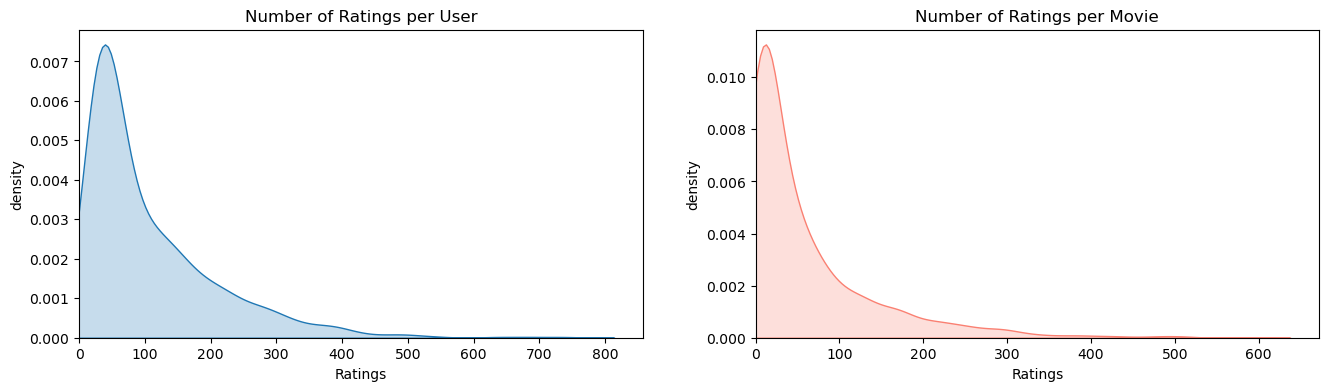

In [413]:
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
sns.kdeplot(n_ratings_per_user, fill=True)
plt.xlim(0)
plt.title('Number of Ratings per User')
plt.xlabel('Ratings')
plt.ylabel('density')

# Ratings per movie
plt.subplot(1, 2, 2)
sns.kdeplot(n_ratings_per_movie, fill=True, color='salmon')
plt.xlim(0)
plt.title('Number of Ratings per Movie')
plt.xlabel('Ratings')
plt.ylabel('density')
plt.show()


# Item-Based Collaborative Filtering (KNN)

In [416]:
# create function for collaborative filtering / fit knn model

from sklearn.neighbors import NearestNeighbors
import numpy as np

def get_similar_movies(movie_id, X_sparse, k):
    knn = NearestNeighbors(metric='cosine', algorithm='brute')
    
    # Fit KNN on transposed (bc we want item-based)
    knn.fit(X_sparse.T)

    # movies start with index=0
    movie_vector = X_sparse.T[movie_id - 1]
    
    # k most similar movies
    distances, indices = knn.kneighbors(movie_vector, n_neighbors=k+1)  # +1 bc the movie itself is included

    similar_movies = [indices[0][i] + 1 for i in range(1, len(distances[0]))]

    return similar_movies

In [418]:
get_similar_movies(100, X_sparse, k=10)

[7, 50, 127, 56, 98, 1, 181, 237, 276, 9]

In [420]:
# create dictionary with movie titles to actually understand what we are doing

movie_titles = dict(zip(movies['movieId'], movies['title']))
movie_id = 100

similar_movies = get_similar_movies(movie_id, X_sparse, k=10)
movie_title=movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Fargo (1996):
Twelve Monkeys (1995)
Star Wars (1977)
Godfather, The (1972)
Pulp Fiction (1994)
Silence of the Lambs, The (1991)
Toy Story (1995)
Return of the Jedi (1983)
Jerry Maguire (1996)
Leaving Las Vegas (1995)
Dead Man Walking (1995)


# Content-Based Filtering

In [423]:
# handling the cold start problem
# generate recommendations based on genre

from sklearn.metrics.pairwise import cosine_similarity

movie_genres = movies.iloc[:, 5:] # genre columns

# Compute cosine similarity between all movies based on genre
cosine_sim = cosine_similarity(movie_genres)

# print matrix for sanity check
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.57735027,
        0.        ],
       [0.        , 1.        , 0.57735027, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.57735027, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.70710678],
       [0.57735027, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.70710678, 0.        ,
        1.        ]])

In [425]:
# good practice to reset the index
movies = movies.reset_index(drop=True)

title_to_index = pd.Series(movies.index, index=movies['title'])

def get_content_recommendations(title, cosine_sim=cosine_sim, movies=movies, k=5):
    # Get index of the movie that matches the title
    idx = title_to_index[title]

    # Get cosine similarity of movie with all the other movies
    sim_scores = list(enumerate(cosine_sim[idx]))
    # sort desc to find the more similar ones
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:k+1] # +1 to exclude the movie in question

    # movie indices for better retreival later
    movie_indices = [i[0] for i in sim_scores]

    # Return the top k most similar movies
    return movies[['movieId', 'title']].iloc[movie_indices]

In [427]:
get_content_recommendations("Godfather, The (1972)", k=5)

,movieId,title
186,187,"Godfather: Part II, The (1974)"
805,806,Menace II Society (1993)
1477,1478,Dead Presidents (1995)
1585,1586,Lashou shentan (1992)
402,403,Batman (1989)


In [ ]:
# xoxo